In [1]:
from Bio import SeqIO
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import gseapy as gp
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
cellmarker_file=pd.read_csv('enrichr/CellMarker_2024_table.txt', sep='\t')
biological_process_file=pd.read_csv('enrichr/GO_Biological_Process_2023_table.txt', sep='\t')
tissues_file=pd.read_csv('enrichr/GTEx_Tissues_V8_2023_table.txt', sep='\t')
diseases_file=pd.read_csv('enrichr/Orphanet_Augmented_2021_table.txt', sep='\t')
rna_seq=pd.read_csv('Expression data/output_dati_gtex.tsv', sep='\t')
exon_file=pd.read_csv('Fasta and tsv/exon_file.tsv', sep='\t')

In [59]:
tissues_of_interest = ["Testis", "Bladder","Skin_Sun_Exposed_Lower_leg", "Nerve_Tibial", "Brain_Cortex", "Brain_Hypothalamus", "Brain_Nucleus_accumbens_basal_ganglia",	"Brain_Putamen_basal_ganglia", "Fallopian_Tube"]

# filtering of RNA-seq data by SEGs only
filtered_rnaseq_genes = rna_seq[rna_seq['Gene'].isin(exon_file['gene_name'])]
print(filtered_rnaseq_genes.head())

# filtering of RNA-seq data by top 25 tissues of interest
filtered_columns = ['Name', 'Gene'] + [col for col in rna_seq.columns if col in tissues_of_interest]
data = filtered_rnaseq_genes[filtered_columns]

# Saving
data.to_csv("filtered_rnaseq_data.tsv", sep="\t", index=False)

                Name     Gene  Adipose_Subcutaneous  Adipose_Visceral_Omentum  \
0  ENSG00000186092.7    OR4F5              0.040547                  0.036390   
1  ENSG00000284733.2   OR4F29              0.033898                  0.032062   
2  ENSG00000284662.2   OR4F16              0.000000                  0.030610   
3  ENSG00000237330.3   RNF223              0.046240                  0.044073   
4  ENSG00000176022.7  B3GALT6             14.954200                 15.105800   

   Adrenal_Gland  Artery_Aorta  Artery_Coronary  Artery_Tibial    Bladder  \
0       0.053730      0.025192         0.035370       0.033259   0.026951   
1       0.051112      0.000000         0.000000       0.000000   0.000000   
2       0.032948      0.000000         0.000000       0.000000   0.000000   
3       0.044154      0.036002         0.036789       0.035839   2.669050   
4      12.902000     15.011800        16.808200      12.888500  13.870700   

   Brain_Amygdala  ...     Spleen    Stomach  Stom

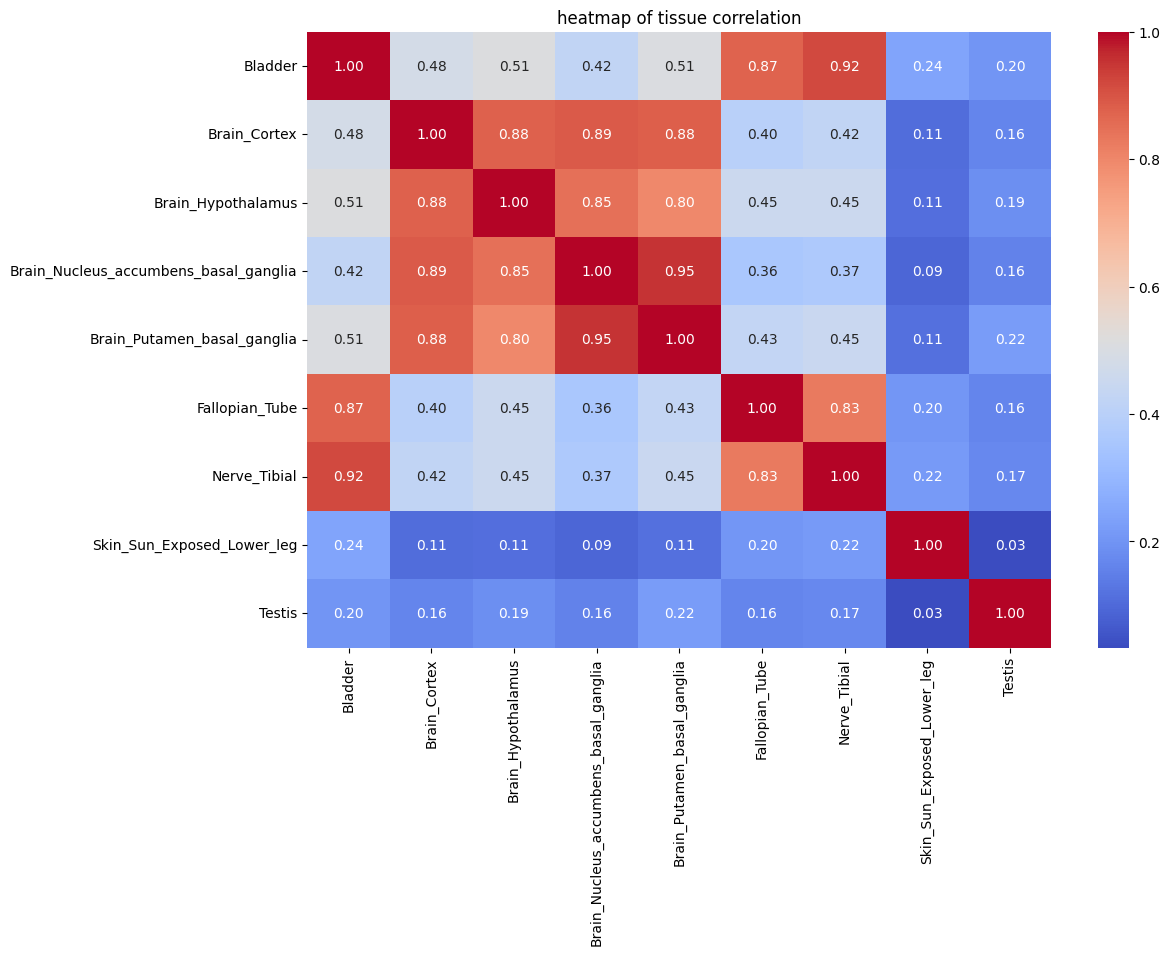

In [61]:
# heatmap of tissue correlation
correlation_matrix = data.iloc[:, 2:].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("heatmap of tissue correlation")
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_20628\3013147997.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


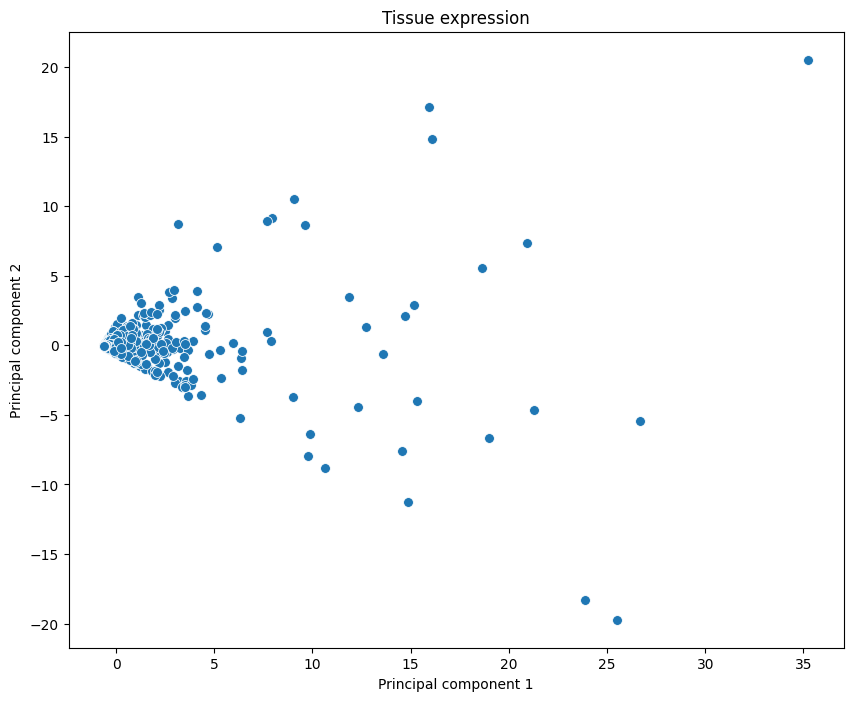

In [62]:
from sklearn.decomposition import PCA

# data standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 2:])

# dimensional reduction with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_pca[:, 0], y=data_pca[:, 1], palette='viridis', s=50
)
plt.title('Tissue expression')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()
